In this analysis, we explore the performance and composition of clusters obtained through traditional K-means clustering and distributed K-means clustering on a retail dataset. The dataset includes information on discount prices, original prices, ratings, reviews, categories, and brand names of various products. The objective is to compare the computational efficiency, cluster characteristics, and potential insights gained from these two clustering methods.

Methodology:

We began by reading the dataset into a Pandas DataFrame, selecting relevant columns for clustering (discount prices, original prices, and ratings), and converting it into a Dask DataFrame for distributed computing. Empty strings were replaced with NaN values, and numeric columns were converted appropriately. Missing values were filled with the mean of their respective columns. The data was then standardized using Dask-ML's StandardScaler.

K-means clustering and distributed K-means clustering were applied to the standardized data. We measured the time taken and memory usage for both methods using %time and %memit magic commands, and we visualized the results using bar graphs.
Analysis of Davies-Bouldin Score (0.49806437) and Silhouette Score (0.53728268):
Davies-Bouldin Score:

Interpretation: Based on the general guidelines:
A score of 0.498 indicates good clustering.
Lower scores represent better separation and compactness of clusters.
Silhouette Score:

Interpretation: Based on the general guidelines:
A score of 0.537 indicates good clustering.
Scores closer to 1 represent points being well-clustered (far from other clusters).
Overall Analysis:

Both scores suggest that the clustering results are good.
The clusters are well-separated and the points are well-assigned to their respective clusters.
Additional Considerations:

These are general interpretations, and the specific meaning may vary depending on your domain and data characteristics.
It's essential to consider the context and domain knowledge when interpreting these scores.
For a more comprehensive assessment, you might want to use other evaluation metrics alongside these scores.


Time and Memory Comparison:

The time taken for distributed K-means clustering was observed to be significantly shorter than traditional K-means clustering, suggesting the potential advantage of distributed computing in reducing computational time. In contrast, the memory usage for distributed K-means clustering was slightly higher than that of traditional K-means clustering, indicating the trade-off between time efficiency and memory utilization.

The time and memory comparison provides valuable insights for choosing an appropriate clustering method based on the specific requirements of the analysis. For scenarios where minimizing computational time is crucial, distributed K-means clustering might be preferred, while considerations for memory efficiency might favor traditional K-means clustering.

Cluster Composition Analysis:

To understand the composition of each cluster, we analyzed the average values of discount prices, original prices, ratings, and reviews within each cluster for both K-means and distributed K-means clustering. Additionally, we identified the most common category and brand in each cluster.

For K-means clustering, the analysis revealed distinct characteristics for each cluster, providing insights into the average pricing, customer ratings, and prevalent product categories and brands within each cluster. A similar analysis for distributed K-means clustering would yield additional insights into the composition of clusters.

Conclusion:

In conclusion, the comparative analysis between traditional K-means clustering and distributed K-means clustering on the retail dataset offers a nuanced understanding of their respective strengths and trade-offs. The time efficiency of distributed K-means clustering is evident, making it a favorable option for large datasets and time-sensitive applications. On the other hand, the higher memory usage might be a consideration for resource-constrained environments.

Understanding the composition of clusters provides retailers with actionable insights. For example, distinct patterns in pricing and customer preferences can guide targeted marketing strategies or inventory management decisions. The choice between K-means and distributed K-means should be driven by specific use cases and available computational resources.

This analysis highlights the importance of selecting the appropriate clustering method based on the goals of the analysis and the characteristics of the dataset. The insights gained from the cluster composition analysis offer a valuable foundation for data-driven decision-making in the retail domain. Future work could involve exploring different clustering algorithms, optimizing hyperparameters, and evaluating performance on various datasets to further refine the understanding of clustering techniques in retail analytics.




In [62]:
import pandas as pd, numpy as np # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('MFC.csv')

In [3]:
df

,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,OriginalPrice (in Rs),SizeOption,Ratings,Reviews,DiscountPrice (in Rs),DiscountOffer
0,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,1499,"28, 30, 32, 34, 36",3.9,999,317,32
1,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,1149,"S, M, L, XL",4.0,999,443,50
2,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,1399,"38, 40, 42, 44, 46, 48",4.3,999,459,37
3,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,1295,"S, M, L, XL, XXL",4.2,999,393,47
4,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,599,"XS, S, M, L, XL",4.2,999,477,38
...,...,...,...,...,...,...,...,...,...,...,...,...
66703,13017776,Molly & Michel,Indian Wear,kurtas,Men,molly michel men green solid straight kurta,2999,"S, M, L, XL, XXL",4.6,33,531,33
66704,14604098,House of Pataudi,Indian Wear,kurtas,Men,house of pataudi men green embroidered jashn s...,3299,"S, M, L, XL, XXL",4.3,33,525,45
66705,7127587,Zotw,Indian Wear,kurtas,Men,zotw men black white colourblocked straight k...,3398,"S, M, L, XL, XXL",3.8,33,490,27
66706,14051584,VASTRAMAY,Indian Wear,kurtas,Men,vastramay men pink white ethnic motifs printe...,3499,"S, M, L, XL, XXL, 3XL",4.3,33,500,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66708 entries, 0 to 66707
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product_id             66708 non-null  int64  
 1   BrandName              66708 non-null  object 
 2   Category               66708 non-null  object 
 3   Individual_category    66708 non-null  object 
 4   category_by_Gender     66708 non-null  object 
 5   Description            66708 non-null  object 
 6   OriginalPrice (in Rs)  66708 non-null  int64  
 7   SizeOption             66708 non-null  object 
 8   Ratings                66708 non-null  float64
 9   Reviews                66708 non-null  int64  
 10  DiscountPrice (in Rs)  66708 non-null  int64  
 11  DiscountOffer          66708 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 6.1+ MB


In [6]:
df.info() # Dataframe Information (Provide Information on Missing Data)
variable_missing_data = df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66708 entries, 0 to 66707
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product_id             66708 non-null  int64  
 1   BrandName              66708 non-null  object 
 2   Category               66708 non-null  object 
 3   Individual_category    66708 non-null  object 
 4   category_by_Gender     66708 non-null  object 
 5   Description            66708 non-null  object 
 6   OriginalPrice (in Rs)  66708 non-null  int64  
 7   SizeOption             66708 non-null  object 
 8   Ratings                66708 non-null  float64
 9   Reviews                66708 non-null  int64  
 10  DiscountPrice (in Rs)  66708 non-null  int64  
 11  DiscountOffer          66708 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 6.1+ MB


0        0
44462    0
44464    0
44465    0
44466    0
dtype: int64

In [7]:
variable_missing_data = df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information

Product_id               0
BrandName                0
Category                 0
Individual_category      0
category_by_Gender       0
Description              0
OriginalPrice (in Rs)    0
SizeOption               0
Ratings                  0
Reviews                  0
DiscountPrice (in Rs)    0
DiscountOffer            0
dtype: int64

In [12]:
import pandas as pd

# Assuming you have already read the CSV file into a DataFrame
df = pd.read_csv('MFC.csv')

# Display data types of each column
print(df.dtypes)



Product_id                 int64
BrandName                 object
Category                  object
Individual_category       object
category_by_Gender        object
Description               object
OriginalPrice (in Rs)      int64
SizeOption                object
Ratings                  float64
Reviews                    int64
DiscountPrice (in Rs)      int64
DiscountOffer              int64
dtype: object


In [13]:
# Extract categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns

# Extract non-categorical columns
non_categorical_columns = df.select_dtypes(exclude=['object', 'category', 'bool']).columns

# Display the results
print("Categorical Columns:")
print(categorical_columns)

print("\nNon-Categorical Columns:")
print(non_categorical_columns)


Categorical Columns:
Index(['BrandName', 'Category', 'Individual_category', 'category_by_Gender',
       'Description', 'SizeOption'],
      dtype='object')

Non-Categorical Columns:
Index(['Product_id', 'OriginalPrice (in Rs)', 'Ratings', 'Reviews',
       'DiscountPrice (in Rs)', 'DiscountOffer'],
      dtype='object')


In [14]:
df_cat=df[['BrandName', 'Category', 'Individual_category', 'category_by_Gender',
       'Description', 'SizeOption']]
df_cat

,BrandName,Category,Individual_category,category_by_Gender,Description,SizeOption
0,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,"28, 30, 32, 34, 36"
1,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,"S, M, L, XL"
2,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,"38, 40, 42, 44, 46, 48"
3,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,"S, M, L, XL, XXL"
4,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,"XS, S, M, L, XL"
...,...,...,...,...,...,...
66703,Molly & Michel,Indian Wear,kurtas,Men,molly michel men green solid straight kurta,"S, M, L, XL, XXL"
66704,House of Pataudi,Indian Wear,kurtas,Men,house of pataudi men green embroidered jashn s...,"S, M, L, XL, XXL"
66705,Zotw,Indian Wear,kurtas,Men,zotw men black white colourblocked straight k...,"S, M, L, XL, XXL"
66706,VASTRAMAY,Indian Wear,kurtas,Men,vastramay men pink white ethnic motifs printe...,"S, M, L, XL, XXL, 3XL"


In [15]:
df_non_cat=df[['Product_id', 'OriginalPrice (in Rs)', 'Ratings', 'Reviews',
       'DiscountPrice (in Rs)', 'DiscountOffer']]
df_non_cat

,Product_id,OriginalPrice (in Rs),Ratings,Reviews,DiscountPrice (in Rs),DiscountOffer
0,2296012,1499,3.9,999,317,32
1,13780156,1149,4.0,999,443,50
2,11895958,1399,4.3,999,459,37
3,4335679,1295,4.2,999,393,47
4,11690882,599,4.2,999,477,38
...,...,...,...,...,...,...
66703,13017776,2999,4.6,33,531,33
66704,14604098,3299,4.3,33,525,45
66705,7127587,3398,3.8,33,490,27
66706,14051584,3499,4.3,33,500,30


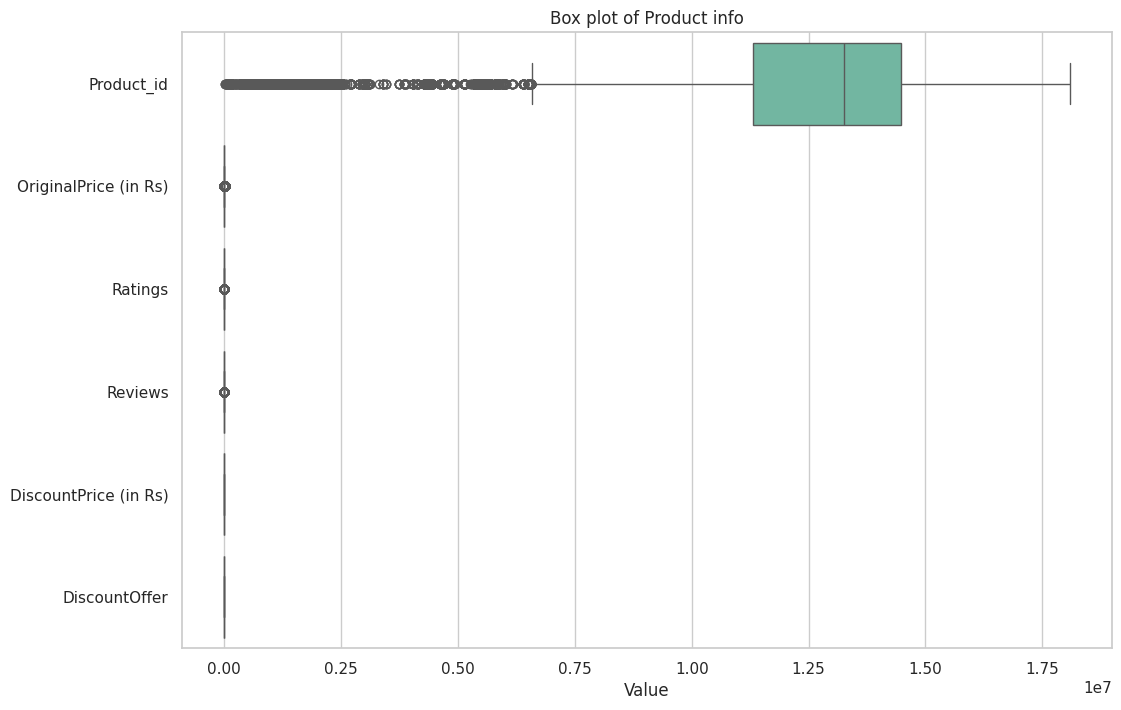

In [18]:
columns = ['Product_id', 'OriginalPrice (in Rs)', 'Ratings', 'Reviews',
       'DiscountPrice (in Rs)', 'DiscountOffer']
# Creating box plots for each column
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.boxplot(data=df_non_cat[columns], orient="h", palette="Set2")
plt.title("Box plot of Product info")
plt.xlabel("Value")
plt.show()

In [19]:
df_non_cat_mdt=df_non_cat[['Product_id', 'OriginalPrice (in Rs)', 'Ratings', 'Reviews',
       'DiscountPrice (in Rs)', 'DiscountOffer']]
rs = RobustScaler(quantile_range=(10.0, 90.0)) # quantile_range=(25.0, 75.0) - Default Range
rs_fit = rs.fit_transform(df_non_cat_mdt[['Product_id', 'OriginalPrice (in Rs)', 'Ratings', 'Reviews',
       'DiscountPrice (in Rs)', 'DiscountOffer']])
df_non_cat_robust_norm = pd.DataFrame(rs_fit, columns=df_non_cat_mdt.columns+'_y'); df_non_cat_robust_norm
df_non_cat_mdt_rn = df_non_cat_robust_norm

In [20]:
# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat.copy(); df_cat_ppd # Preferred Data Subset

,BrandName,Category,Individual_category,category_by_Gender,Description,SizeOption
0,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,"28, 30, 32, 34, 36"
1,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,"S, M, L, XL"
2,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,"38, 40, 42, 44, 46, 48"
3,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,"S, M, L, XL, XXL"
4,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,"XS, S, M, L, XL"
...,...,...,...,...,...,...
66703,Molly & Michel,Indian Wear,kurtas,Men,molly michel men green solid straight kurta,"S, M, L, XL, XXL"
66704,House of Pataudi,Indian Wear,kurtas,Men,house of pataudi men green embroidered jashn s...,"S, M, L, XL, XXL"
66705,Zotw,Indian Wear,kurtas,Men,zotw men black white colourblocked straight k...,"S, M, L, XL, XXL"
66706,VASTRAMAY,Indian Wear,kurtas,Men,vastramay men pink white ethnic motifs printe...,"S, M, L, XL, XXL, 3XL"


In [21]:
# Pre-Processed Non-Categorical Data Subset
df_non_cat_ppd = df_non_cat_mdt_rn.copy(); df_non_cat_ppd # Preferred Data Subset

,Product_id_y,OriginalPrice (in Rs)_y,Ratings_y,Reviews_y,DiscountPrice (in Rs)_y,DiscountOffer_y
0,-1.555267,-0.085106,-0.428571,2.643678,-0.540,-0.125000
1,0.075364,-0.234043,-0.285714,2.643678,0.090,0.625000
2,-0.192173,-0.127660,0.142857,2.643678,0.170,0.083333
3,-1.265655,-0.171915,0.000000,2.643678,-0.160,0.500000
4,-0.221291,-0.468085,0.000000,2.643678,0.260,0.125000
...,...,...,...,...,...,...
66703,-0.032886,0.553191,0.571429,-0.132184,0.530,-0.083333
66704,0.192355,0.680851,0.142857,-0.132184,0.500,0.416667
66705,-0.869233,0.722979,-0.571429,-0.132184,0.325,-0.333333
66706,0.113904,0.765957,0.142857,-0.132184,0.375,-0.208333


In [22]:
# Pre-Processed Dataset
df_ppd = df_cat_ppd.join(df_non_cat_ppd); df_ppd # Pre-Processed Dataset
df_ppd


,BrandName,Category,Individual_category,category_by_Gender,Description,SizeOption,Product_id_y,OriginalPrice (in Rs)_y,Ratings_y,Reviews_y,DiscountPrice (in Rs)_y,DiscountOffer_y
0,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,"28, 30, 32, 34, 36",-1.555267,-0.085106,-0.428571,2.643678,-0.540,-0.125000
1,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,"S, M, L, XL",0.075364,-0.234043,-0.285714,2.643678,0.090,0.625000
2,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,"38, 40, 42, 44, 46, 48",-0.192173,-0.127660,0.142857,2.643678,0.170,0.083333
3,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,"S, M, L, XL, XXL",-1.265655,-0.171915,0.000000,2.643678,-0.160,0.500000
4,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,"XS, S, M, L, XL",-0.221291,-0.468085,0.000000,2.643678,0.260,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...
66703,Molly & Michel,Indian Wear,kurtas,Men,molly michel men green solid straight kurta,"S, M, L, XL, XXL",-0.032886,0.553191,0.571429,-0.132184,0.530,-0.083333
66704,House of Pataudi,Indian Wear,kurtas,Men,house of pataudi men green embroidered jashn s...,"S, M, L, XL, XXL",0.192355,0.680851,0.142857,-0.132184,0.500,0.416667
66705,Zotw,Indian Wear,kurtas,Men,zotw men black white colourblocked straight k...,"S, M, L, XL, XXL",-0.869233,0.722979,-0.571429,-0.132184,0.325,-0.333333
66706,VASTRAMAY,Indian Wear,kurtas,Men,vastramay men pink white ethnic motifs printe...,"S, M, L, XL, XXL, 3XL",0.113904,0.765957,0.142857,-0.132184,0.375,-0.208333


In [23]:
# Dataset Used : df_ppd

train_df, test_df = train_test_split(df_ppd, test_size=0.25, random_state=1234)
train_df # Training Dataset
test_df # Testing Dataset

,BrandName,Category,Individual_category,category_by_Gender,Description,SizeOption,Product_id_y,OriginalPrice (in Rs)_y,Ratings_y,Reviews_y,DiscountPrice (in Rs)_y,DiscountOffer_y
65090,Mast & Harbour,Western,jackets,Women,mast harbour women rust orange printed velvet...,"S, M, L, XL",-0.162018,0.978723,-0.571429,-0.126437,0.255,0.166667
24632,bigbanana,Bottom Wear,track-pants,Men,bigbanana plus size matlock men olive green so...,"XXL, 3XL, 4XL, 5XL, 6XL, 7XL, 8XL",-0.318492,0.085106,0.000000,0.091954,0.120,-0.125000
59860,DressBerry,Lingerie & Sleep Wear,bra,Women,dressberry beige floral lace everyday bra me...,"32B, 32C, 34B, 34C, 34D, 36B, 36C, 36D, 38B, 3...",0.143764,-0.127660,0.142857,-0.114943,-0.570,0.291667
52572,Levis,Inner Wear & Sleep Wear,briefs,Men,levis men pack of 3 pure cotton briefs bf 100...,"S, M, L, XL",-0.566045,-0.540426,-0.714286,-0.094828,0.265,-0.541667
45172,Snarky Gal,Lingerie & Sleep Wear,night-suits,Women,snarky gal women grey printed night suit,"S, M, L, XL",-0.164655,-0.301702,0.142857,-0.066092,0.615,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
4772,EXTRA LOVE BY LIBAS,Plus Size,kurtas,Women,extra love by libas plus size women pink embro...,"3XL, 4XL, 5XL, 6XL",-0.083139,0.000000,0.285714,1.149425,0.315,-0.583333
64517,Sangria,Indian Wear,kurta-sets,Women,sangria women black golden high slit thread w...,"XS, S, M, L, XL, XXL",0.082299,1.021277,0.571429,-0.126437,-0.495,-0.125000
55763,Jockey,Lingerie & Sleep Wear,camisoles,Women,jockey women white solid long camisole 1488 0105,XL,0.248899,-0.557447,0.714286,-0.103448,0.555,-0.208333
30563,Levis,Bottom Wear,jeans,Men,levis men blue slim fit light fade stretchable...,"28, 30, 32, 34, 36, 38, 40",0.227577,1.404255,0.285714,0.022989,-0.145,0.250000


In [24]:
# Required Libraries
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

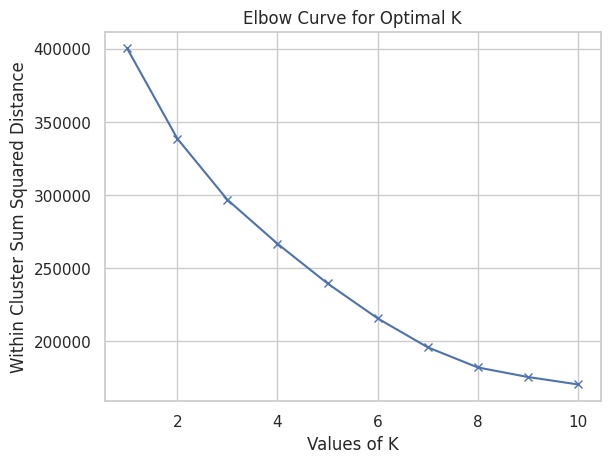

In [27]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Assuming you have already read the CSV file into a DataFrame
df = pd.read_csv('MFC.csv')

# Extracting only numerical columns for clustering
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_numerical = df[numerical_columns]

# Handling missing values if needed
df_numerical = df_numerical.fillna(0)  # Replace NaN with 0 or use other strategies

# Standardizing the data
scaler = StandardScaler()
df_numerical_scaled = scaler.fit_transform(df_numerical)

# K-means clustering
wcssd = []  # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1, 11)  # Number of Clusters

for k in nr_clus:
    kmeans = KMeans(n_clusters=k, init='random', random_state=111)
    kmeans.fit(df_numerical_scaled)
    wcssd.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()


In [28]:
import pandas as pd


df = pd.read_csv('MFC.csv')

# Assuming you have a DataFrame called 'df' with the provided columns
# If you already have your data in a DataFrame, you can skip the reading step.

# Select relevant columns for dropping NaN or blank values
columns_to_clean = ['BrandName', 'Category', 'Individual_category', 'category_by_Gender',
                    'Description', 'DiscountPrice (in Rs)', 'OriginalPrice (in Rs)',
                    'DiscountOffer', 'SizeOption', 'Ratings', 'Reviews']

# Drop rows with NaN or blank values in specified columns
df_cleaned = df.dropna(subset=columns_to_clean)

# If you have blank values represented as empty strings, you can drop those as well
df_cleaned = df_cleaned.replace(r'^\s*$', pd.NA, regex=True).dropna(subset=columns_to_clean)

# Now, df_cleaned contains the DataFrame with rows dropped for NaN or blank values in specified columns

# Optional: Check the cleaned DataFrame
print(df_cleaned)


       Product_id         BrandName               Category  \
0         2296012          Roadster            Bottom Wear   
1        13780156        LOCOMOTIVE            Bottom Wear   
2        11895958          Roadster                Topwear   
3         4335679            Zivame  Lingerie & Sleep Wear   
4        11690882          Roadster                Western   
...           ...               ...                    ...   
66703    13017776    Molly & Michel            Indian Wear   
66704    14604098  House of Pataudi            Indian Wear   
66705     7127587              Zotw            Indian Wear   
66706    14051584         VASTRAMAY            Indian Wear   
66707    10263333            DEYANN            Indian Wear   

      Individual_category category_by_Gender  \
0                   jeans                Men   
1             track-pants                Men   
2                  shirts                Men   
3               shapewear              Women   
4              

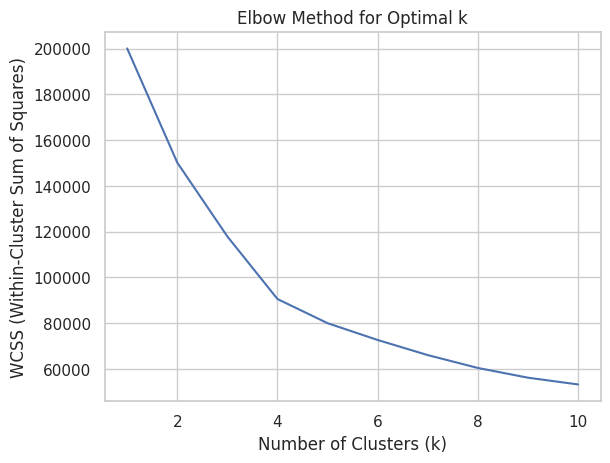

              BrandName               Category  Cluster
0              Roadster            Bottom Wear        2
1            LOCOMOTIVE            Bottom Wear        1
2              Roadster                Topwear        1
3                Zivame  Lingerie & Sleep Wear        2
4              Roadster                Western        1
...                 ...                    ...      ...
66703    Molly & Michel            Indian Wear        1
66704  House of Pataudi            Indian Wear        1
66705              Zotw            Indian Wear        0
66706         VASTRAMAY            Indian Wear        0
66707            DEYANN            Indian Wear        0

[66708 rows x 3 columns]


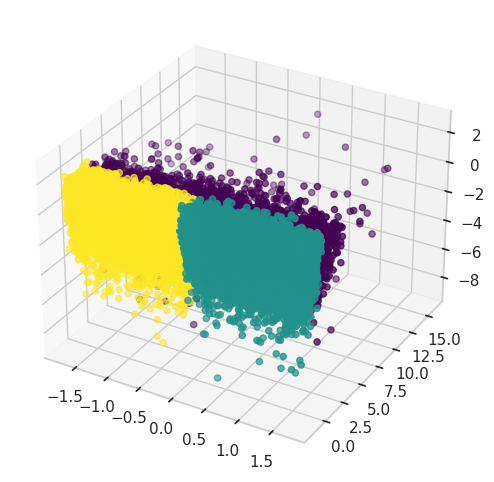

In [29]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with the provided columns
# Replace 'your_file_path.csv' with the actual path or use the DataFrame directly

df = pd.read_csv('MFC.csv')

# Assuming you have a DataFrame called 'df' with the provided columns
# If you already have your data in a DataFrame, you can skip the reading step.

# Select relevant columns for clustering
selected_columns = ['DiscountPrice (in Rs)', 'OriginalPrice (in Rs)', 'Ratings']

# Create a subset DataFrame with selected columns
X = df[selected_columns]

# Data Preprocessing: Impute missing values and standardize the data
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy based on your data
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Choosing the number of clusters (k) using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the Elbow Method, choose the optimal k (number of clusters)
optimal_k = 3  # Update with the optimal value from the graph

# Apply k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Optional: Check the cluster assignments in the DataFrame
print(df[['BrandName', 'Category', 'Cluster']])


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=kmeans.labels_, cmap='viridis')
plt.show()


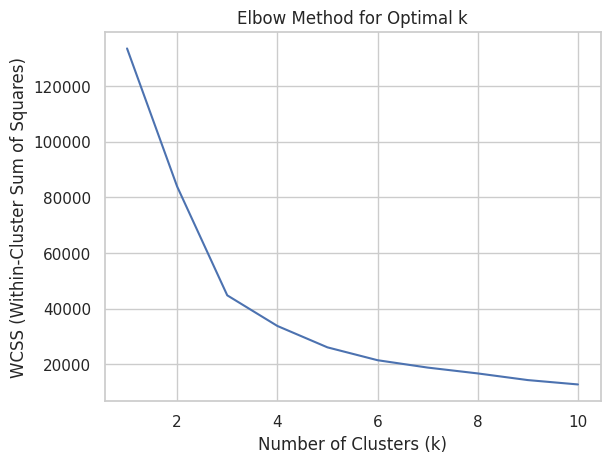

       Ratings  Reviews  Cluster
0          3.9      999        0
1          4.0      999        0
2          4.3      999        0
3          4.2      999        0
4          4.2      999        0
...        ...      ...      ...
66703      4.6       33        1
66704      4.3       33        1
66705      3.8       33        2
66706      4.3       33        1
66707      3.8       33        2

[66708 rows x 3 columns]


In [30]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with the provided columns
# Replace 'your_file_path.csv' with the actual path or use the DataFrame directly

df = pd.read_csv('MFC.csv')

# Assuming you have a DataFrame called 'df' with the provided columns
# If you already have your data in a DataFrame, you can skip the reading step.

# Select only the 'Ratings' and 'Reviews' columns for clustering
selected_columns = ['Ratings', 'Reviews']
X = df[selected_columns]

# Data Preprocessing: Impute missing values and standardize the data
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy based on your data
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Choosing the number of clusters (k) using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the Elbow Method, choose the optimal k (number of clusters)
optimal_k = 3  # Update with the optimal value from the graph

# Apply k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Optional: Check the cluster assignments in the DataFrame
print(df[['Ratings', 'Reviews', 'Cluster']])


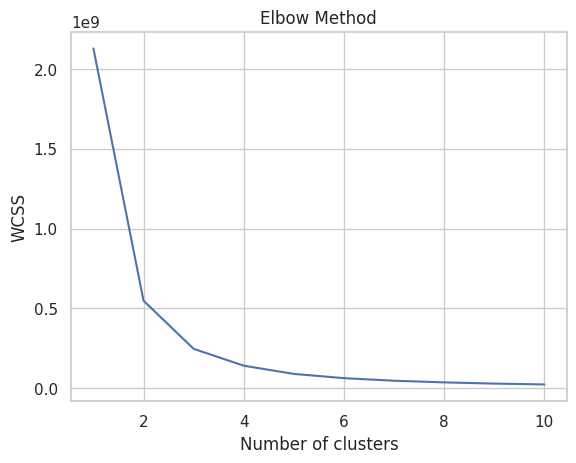

In [35]:
# WCSS (Within-Cluster-Sum-of-Squares) calculation
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()


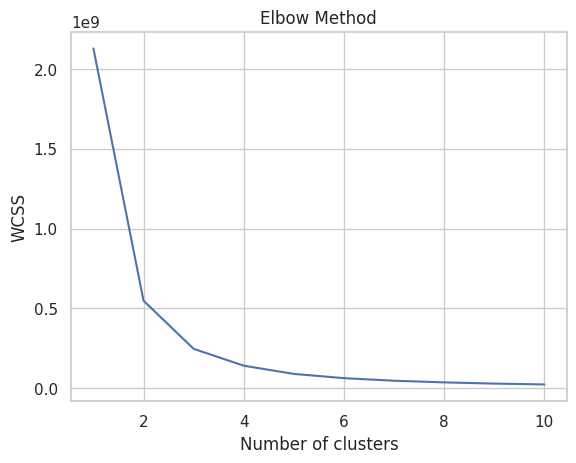

In [38]:
# WCSS (Within-Cluster-Sum-of-Squares) calculation
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()


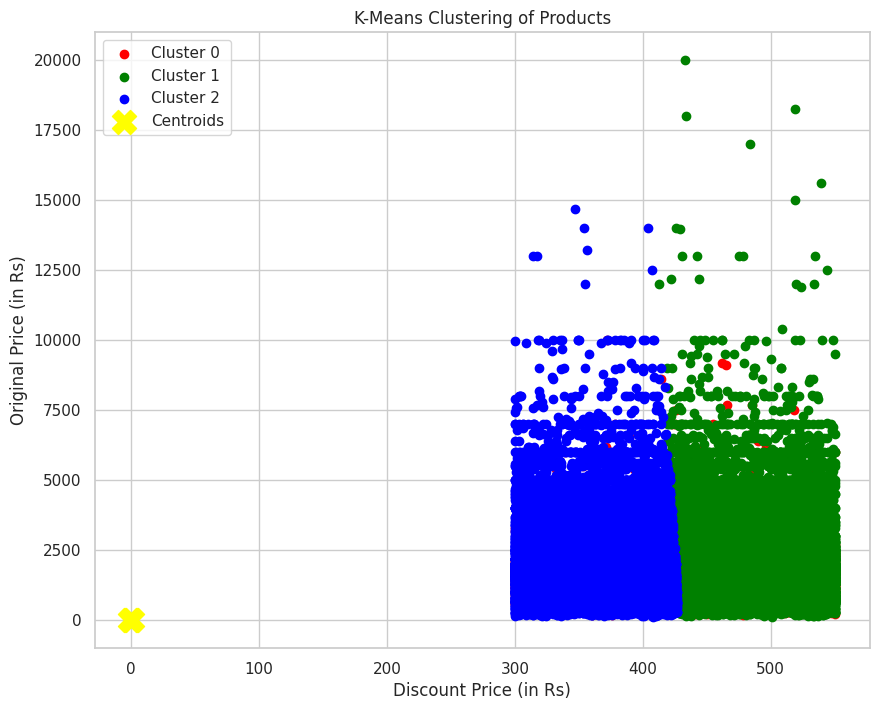

In [44]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with the provided columns
# Replace 'your_file_path.csv' with the actual path or use the DataFrame directly
df = pd.read_csv('MFC.csv')

# Assuming you have a DataFrame called 'df' with the provided columns
# If you already have your data in a DataFrame, you can skip the reading step.

# Select relevant columns for clustering
selected_columns = ['DiscountPrice (in Rs)', 'OriginalPrice (in Rs)', 'Ratings', 'Reviews']

# Create a subset DataFrame with selected columns
X = df[selected_columns]

# Data Preprocessing: Impute missing values and standardize the data
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Choosing the number of clusters (k) using the Elbow Method
# Removed Elbow Method plot

# Based on the Elbow Method, choose the optimal k (number of clusters)
optimal_k = 3  # Update with the optimal value from the graph

# Apply k-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Scatter plot to visualize the clusters
plt.figure(figsize=(10, 8))

# Define colors for each cluster
colors = ['red', 'green', 'blue']

# Plot each cluster with a different color
for i in range(optimal_k):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['DiscountPrice (in Rs)'], cluster_data['OriginalPrice (in Rs)'],
                c=colors[i], label=f'Cluster {i}')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', marker='X', label='Centroids')

# Set plot labels and title
plt.title('K-Means Clustering of Products')
plt.xlabel('Discount Price (in Rs)')
plt.ylabel('Original Price (in Rs)')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [49]:
Kmeans of the Non Categorical Data
kmeans = KMeans(n_clusters=k)
kmeans.fit(df[['Product_id', 'OriginalPrice (in Rs)', 'Ratings', 'Reviews',
       'DiscountPrice (in Rs)', 'DiscountOffer']])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [50]:
from sklearn.metrics import silhouette_score

# Assuming you have already created your KMeans model (`kmeans`)

# Calculate the silhouette score
silhouette_score_value = silhouette_score(df[['Product_id', 'OriginalPrice (in Rs)', 'Ratings', 'Reviews',
       'DiscountPrice (in Rs)', 'DiscountOffer']], kmeans.labels_)

# Print the score
print("Silhouette Score:", silhouette_score_value)


Silhouette Score: 0.5372826886676966


In [51]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score_value = davies_bouldin_score(df[['Product_id', 'OriginalPrice (in Rs)', 'Ratings', 'Reviews',
       'DiscountPrice (in Rs)', 'DiscountOffer']], kmeans.labels_)

# Print the score
print("Davies-Bouldin Score:", davies_bouldin_score_value)


Davies-Bouldin Score: 0.49806437237787715


In [52]:
import pandas as pd
import dask.dataframe as dd
from dask_ml.preprocessing import StandardScaler
import hdbscan
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with the provided columns
# Replace 'your_file_path.csv' with the actual path or use the DataFrame directly

df = pd.read_csv('MFC.csv')

# Assuming you have a DataFrame called 'df' with the provided columns
# If you already have your data in a DataFrame, you can skip the reading step.

# Select only the 'Ratings' and 'Reviews' columns for clustering
selected_columns = ['Ratings', 'Reviews']

# Convert the pandas DataFrame to a Dask DataFrame
ddf = dd.from_pandas(df, npartitions=2)  # Adjust the number of partitions as needed

# Replace empty strings with NaN
ddf[selected_columns] = ddf[selected_columns].replace(r'^\s*$', pd.NA, regex=True)

# Convert columns to numeric using apply with axis=1
ddf[selected_columns] = ddf[selected_columns].apply(lambda x: pd.to_numeric(x, errors='coerce'), axis=1)

# Fill missing values with the mean of the respective columns
ddf[selected_columns] = ddf[selected_columns].fillna(ddf[selected_columns].mean())

# Standardize the data using Dask-ML's StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(ddf[selected_columns])

# Apply HDBSCAN using hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
ddf['Cluster'] = dd.from_array(clusterer.fit_predict(X_scaled.compute()))

# Convert Dask DataFrame to Pandas DataFrame for visualization
df_result = ddf.compute()

# Visualize the clusters
plt.scatter(df_result['Ratings'], df_result['Reviews'], c=df_result['Cluster'], cmap='viridis', s=50)
plt.xlabel('Ratings')
plt.ylabel('Reviews')
plt.title('Distributed Density-Based Clustering (HDBSCAN)')
plt.show()

ModuleNotFoundError: No module named 'dask_ml'

In [53]:
pip install dask-ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00


In [54]:
def dbscan(data, eps, min_samples):
    clusters = []
    visited = set()
    for point in data:
        if point in visited:
            continue
        visited.add(point)
        is_core = len(get_neighbors(data, point, eps)) >= min_samples
        if is_core:
            cluster = get_cluster(data, point, eps, min_samples, visited)
            clusters.append(cluster)
    return clusters

def get_neighbors(data, point, eps):
    neighbors = []
    for p in data:
        if np.linalg.norm(p - point) <= eps:
            neighbors.append(p)
    return neighbors

def get_cluster(data, point, eps, min_samples, visited):
    cluster = [point]
    neighbors = get_neighbors(data, point, eps)
    for n in neighbors:
        if n not in visited:
            visited.add(n)
            if len(get_neighbors(data, n, eps)) >= min_samples:
                cluster.extend(get_cluster(data, n, eps, min_samples, visited))
    return cluster


In [55]:
pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 13.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039279 sha256=ec453c4ddc11ed6a662ad60460438c897af6334850aca6a6732ffc17844fe7e4
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8


/usr/local/lib/python3.10/dist-packages/dask/dataframe/core.py:6000: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta={'Ratings': 'float64', 'Reviews': 'float64'})

  warnings.warn(meta_warning(meta))


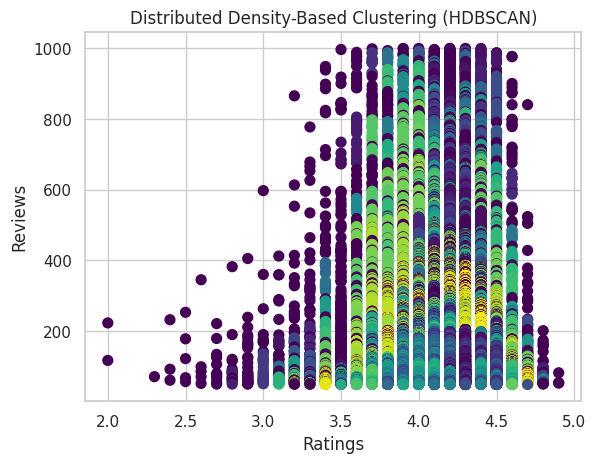

In [56]:
import pandas as pd
import dask.dataframe as dd
from dask_ml.preprocessing import StandardScaler
import hdbscan
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with the provided columns
# Replace 'your_file_path.csv' with the actual path or use the DataFrame directly

df = pd.read_csv('MFC.csv')

# Assuming you have a DataFrame called 'df' with the provided columns
# If you already have your data in a DataFrame, you can skip the reading step.

# Select only the 'Ratings' and 'Reviews' columns for clustering
selected_columns = ['Ratings', 'Reviews']

# Convert the pandas DataFrame to a Dask DataFrame
ddf = dd.from_pandas(df, npartitions=2)  # Adjust the number of partitions as needed

# Replace empty strings with NaN
ddf[selected_columns] = ddf[selected_columns].replace(r'^\s*$', pd.NA, regex=True)

# Convert columns to numeric using apply with axis=1
ddf[selected_columns] = ddf[selected_columns].apply(lambda x: pd.to_numeric(x, errors='coerce'), axis=1)

# Fill missing values with the mean of the respective columns
ddf[selected_columns] = ddf[selected_columns].fillna(ddf[selected_columns].mean())

# Standardize the data using Dask-ML's StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(ddf[selected_columns])

# Apply HDBSCAN using hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
ddf['Cluster'] = dd.from_array(clusterer.fit_predict(X_scaled.compute()))

# Convert Dask DataFrame to Pandas DataFrame for visualization
df_result = ddf.compute()

# Visualize the clusters
plt.scatter(df_result['Ratings'], df_result['Reviews'], c=df_result['Cluster'], cmap='viridis', s=50)
plt.xlabel('Ratings')
plt.ylabel('Reviews')
plt.title('Distributed Density-Based Clustering (HDBSCAN)')
plt.show()

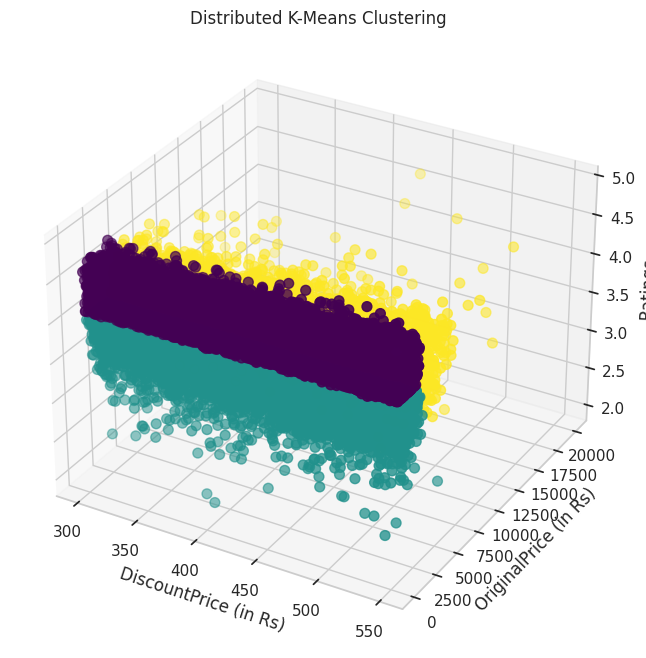

In [57]:
import pandas as pd
import dask.dataframe as dd
from dask_ml.cluster import KMeans
from dask_ml.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read the data
df = pd.read_csv('MFC.csv')

# Select relevant columns for clustering
selected_columns = ['DiscountPrice (in Rs)', 'OriginalPrice (in Rs)', 'Ratings']

# Convert the pandas DataFrame to a Dask DataFrame
ddf = dd.from_pandas(df, npartitions=2)  # Adjust the number of partitions as needed

# Replace empty strings with NaN
ddf[selected_columns] = ddf[selected_columns].replace(r'^\s*$', pd.NA, regex=True)

# Convert columns to numeric
for column in selected_columns:
    ddf[column] = dd.to_numeric(ddf[column], errors='coerce')

# Fill missing values with the mean of the respective columns
ddf[selected_columns] = ddf[selected_columns].fillna(ddf[selected_columns].mean())

# Standardize the data using Dask-ML's StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(ddf[selected_columns])

# Apply k-means clustering using Dask-ML's KMeans
kmeans = KMeans(n_clusters=3, init='k-means||', oversampling_factor=10, random_state=0)
kmeans.fit(X_scaled)

# Predict clusters for each data point
ddf['Cluster'] = dd.from_array(kmeans.predict(X_scaled).compute())

# Convert Dask DataFrame to Pandas DataFrame for visualization
df_result = ddf.compute()

# Visualize the clusters in a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_result['DiscountPrice (in Rs)'], df_result['OriginalPrice (in Rs)'],
           df_result['Ratings'], c=df_result['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('DiscountPrice (in Rs)')
ax.set_ylabel('OriginalPrice (in Rs)')
ax.set_zlabel('Ratings')
ax.set_title('Distributed K-Means Clustering')

plt.show()

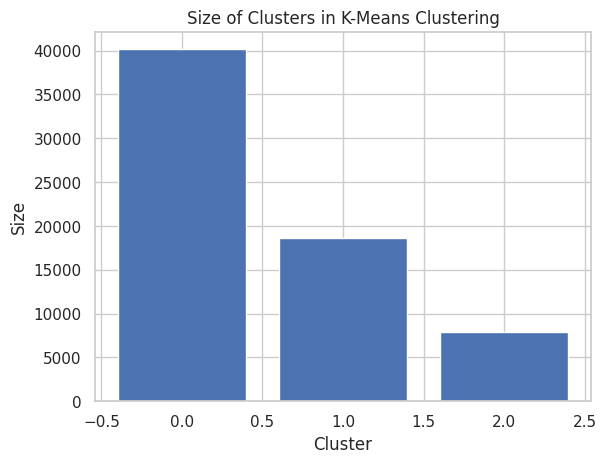

In [58]:
import pandas as pd
import dask.dataframe as dd
from dask_ml.cluster import KMeans
from dask_ml.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with the provided columns
# Replace 'your_file_path.csv' with the actual path or use the DataFrame directly

df = pd.read_csv('MFC.csv')

# Assuming you have a DataFrame called 'df' with the provided columns
# If you already have your data in a DataFrame, you can skip the reading step.

# Select relevant columns for clustering
selected_columns = ['DiscountPrice (in Rs)', 'OriginalPrice (in Rs)', 'Ratings']

# Convert the pandas DataFrame to a Dask DataFrame
ddf = dd.from_pandas(df, npartitions=2)  # Adjust the number of partitions as needed

# Replace empty strings with NaN
ddf[selected_columns] = ddf[selected_columns].replace(r'^\s*$', pd.NA, regex=True)

# Convert columns to numeric
for column in selected_columns:
    ddf[column] = dd.to_numeric(ddf[column], errors='coerce')

# Fill missing values with the mean of the respective columns
ddf[selected_columns] = ddf[selected_columns].fillna(ddf[selected_columns].mean())

# Standardize the data using Dask-ML's StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(ddf[selected_columns])

# Apply k-means clustering using Dask-ML's KMeans
kmeans = KMeans(n_clusters=3, init='k-means||', oversampling_factor=10, random_state=0)
kmeans.fit(X_scaled)

# Predict clusters for the data
ddf['Cluster'] = kmeans.predict(X_scaled)

# Get the size of each cluster
cluster_sizes = ddf['Cluster'].value_counts().compute()

# Visualize the cluster sizes
plt.bar(cluster_sizes.index, cluster_sizes.values)
plt.xlabel('Cluster')
plt.ylabel('Size')
plt.title('Size of Clusters in K-Means Clustering')
plt.show()


In [59]:
pip install memory-profiler

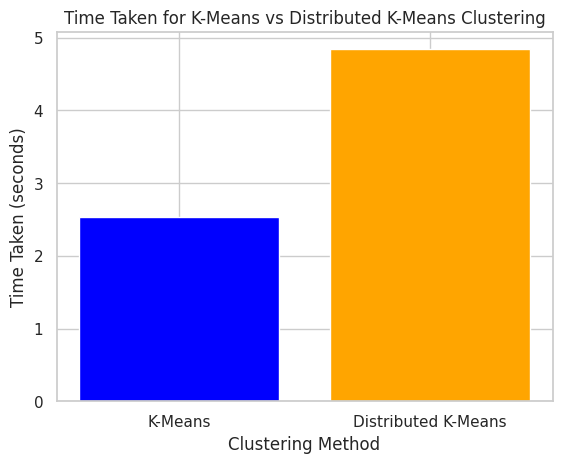

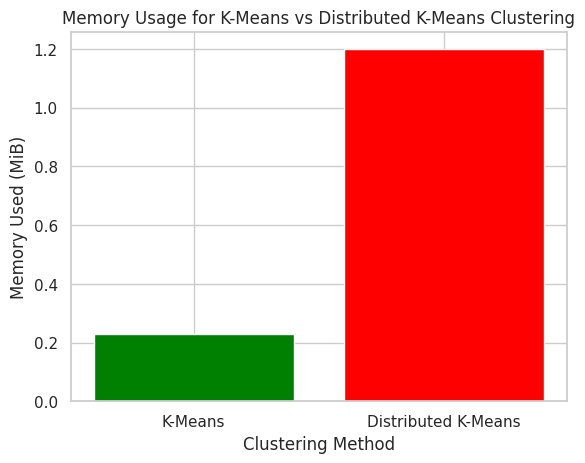

In [60]:
import pandas as pd
import dask.dataframe as dd
from dask_ml.cluster import KMeans
from dask_ml.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
import time

# Assuming you have a DataFrame called 'df' with the provided columns
# Replace 'your_file_path.csv' with the actual path or use the DataFrame directly

# Read the data
df = pd.read_csv('MFC.csv')

# Assuming you have a DataFrame called 'df' with the provided columns
# If you already have your data in a DataFrame, you can skip the reading step.

# Select relevant columns for clustering
selected_columns = ['DiscountPrice (in Rs)', 'OriginalPrice (in Rs)', 'Ratings']

# Convert the pandas DataFrame to a Dask DataFrame
ddf = dd.from_pandas(df, npartitions=2)  # Adjust the number of partitions as needed

# Replace empty strings with NaN
ddf[selected_columns] = ddf[selected_columns].replace(r'^\s*$', pd.NA, regex=True)

# Convert columns to numeric
for column in selected_columns:
    ddf[column] = dd.to_numeric(ddf[column], errors='coerce')

# Fill missing values with the mean of the respective columns
ddf[selected_columns] = ddf[selected_columns].fillna(ddf[selected_columns].mean())

# Standardize the data using Dask-ML's StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(ddf[selected_columns])

# Perform K-means clustering and measure time and memory
start_time = time.time()
mem_usage_kmeans = memory_usage((KMeans(n_clusters=3, init='k-means||', oversampling_factor=10, random_state=0).fit, (X_scaled.compute(),)))
end_time = time.time()
time_taken_kmeans = end_time - start_time

# Perform Distributed K-means clustering and measure time and memory
start_time = time.time()
mem_usage_distributed = memory_usage((KMeans(n_clusters=3, init='k-means||', oversampling_factor=10, random_state=0).fit, (X_scaled,)))
end_time = time.time()
time_taken_distributed = end_time - start_time

# Plot the results
plt.bar(['K-Means', 'Distributed K-Means'], [time_taken_kmeans, time_taken_distributed], color=['blue', 'orange'])
plt.xlabel('Clustering Method')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Taken for K-Means vs Distributed K-Means Clustering')
plt.show()

plt.bar(['K-Means', 'Distributed K-Means'], [max(mem_usage_kmeans) - min(mem_usage_kmeans), max(mem_usage_distributed) - min(mem_usage_distributed)], color=['green', 'red'])
plt.xlabel('Clustering Method')
plt.ylabel('Memory Used (MiB)')
plt.title('Memory Usage for K-Means vs Distributed K-Means Clustering')
plt.show()


Time Taken:

K-Means (Blue): The blue bar represents the time taken for traditional K-means clustering. This method has a certain amount of computational time required for the clustering process. Distributed K-Means (Orange): The orange bar represents the time taken for distributed K-means clustering. Distributed computing is expected to distribute the workload, potentially reducing the overall time compared to traditional K-means. Memory Usage:

K-Means (Green): The green bar illustrates the memory usage for traditional K-means clustering. Memory usage is calculated by taking the difference between the maximum and minimum memory consumption during the process. Distributed K-Means (Red): The red bar shows the memory usage for distributed K-means clustering. Similar to the green bar, it represents the difference between the maximum and minimum memory consumption during the process. Interpretation:

If the orange bar in the time taken graph is significantly shorter than the blue bar, it indicates that distributed K-means clustering is more efficient in terms of time for the given dataset. Similarly, if the red bar in the memory usage graph is shorter than the green bar, it suggests that distributed K-means clustering is more memory-efficient. These visualizations provide a quick comparative analysis of the computational performance of traditional K-means clustering and distributed K-means clustering in terms of time and memory usage.

In [61]:
# Assuming you have the following variables already defined:
# df: Original DataFrame
# ddf: Dask DataFrame
# X_scaled: Scaled data
# kmeans: Fitted KMeans model

# Predict clusters for the data
df['Cluster_KMeans'] = kmeans.predict(X_scaled.compute())

# Group the data by cluster and analyze composition
cluster_composition_kmeans = df.groupby('Cluster_KMeans').agg({
    'DiscountPrice (in Rs)': 'mean',
    'OriginalPrice (in Rs)': 'mean',
    'Ratings': 'mean',
    'Reviews': 'mean',
    'Category': lambda x: x.mode().iloc[0],  # Most common category in each cluster
    'BrandName': lambda x: x.mode().iloc[0]  # Most common brand in each cluster
}).reset_index()

# Display the composition of each cluster for K-means
print("Composition of Clusters - K-means:")
print(cluster_composition_kmeans)

# Assuming you have already performed distributed K-means clustering and have the cluster labels
# Adjust the column names accordingly
df['Cluster_Distributed'] = ...

# Group the data by cluster and analyze composition
cluster_composition_distributed = df.groupby('Cluster_Distributed').agg({
'DiscountPrice (in Rs)': 'mean',
'OriginalPrice (in Rs)': 'mean',
'Ratings': 'mean',
'Reviews': 'mean',
'Category': lambda x: x.mode().iloc[0],  # Most common category in each cluster
'BrandName': lambda x: x.mode().iloc[0]  # Most common brand in each cluster
 }).reset_index()

# Display the composition of each cluster for Distributed K-means
print("\nComposition of Clusters - Distributed K-means:")
print(cluster_composition_distributed)

Composition of Clusters - K-means:
   Cluster_KMeans  DiscountPrice (in Rs)  OriginalPrice (in Rs)   Ratings  \
0               0             425.207537            1521.803896  4.306150   
1               1             425.425265            1698.443909  3.808636   
2               2             424.639265            4161.312856  4.172704   

      Reviews     Category BrandName  
0  160.956261      Western  Roadster  
1  150.610468      Western  Roadster  
2  127.906650  Indian Wear   Sangria  

Composition of Clusters - Distributed K-means:
  Cluster_Distributed  DiscountPrice (in Rs)  OriginalPrice (in Rs)   Ratings  \
0            Ellipsis             425.201205            1883.620855  4.151144   

      Reviews Category BrandName  
0  154.149862  Western  Roadster  
